In [1]:
#importing required libraries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
#Defining Constants
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [3]:
# Loading Dataset
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
#Viewing Class Names
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 1 0 1 1 1 1 2 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1]


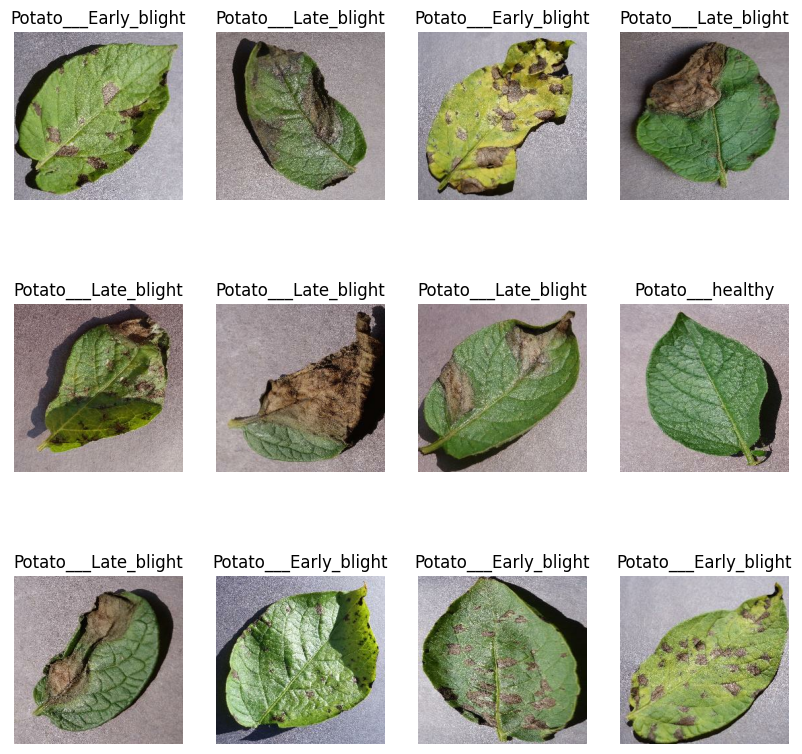

In [5]:
#Visualizing Sample Images
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
#Splitting the Dataset
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+test_split+val_split)==1
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    

    return train_ds,val_ds,test_ds

In [7]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [8]:
len(train_ds)


54

In [9]:
len(val_ds)

6

In [10]:
len(test_ds)

8

In [11]:
#Caching, Shuffling, and Prefetching
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
# Image Preprocessing and Augmentation
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [13]:
#8. Image Preprocessing and Augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
#Model Definition
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),  # Added Conv Layer
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  # Added Conv Layer
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  # Added Conv Layer
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  # Added Conv Layer
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),  # Added Conv Layer
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)


In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 252, 252, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 126, 126, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (32, 124, 124, 64)        18496     
                                                      

In [16]:
#Model Compilation
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
#Model Training
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
54/54 [==============================] - 117s 2s/step - loss: 0.8921 - accuracy: 0.4745 - val_loss: 0.8039 - val_accuracy: 0.4635
Epoch 2/50
54/54 [==============================] - 111s 2s/step - loss: 0.6466 - accuracy: 0.7211 - val_loss: 0.4554 - val_accuracy: 0.7969
Epoch 3/50
54/54 [==============================] - 1326s 25s/step - loss: 0.4090 - accuracy: 0.8264 - val_loss: 0.4836 - val_accuracy: 0.8542
Epoch 4/50
54/54 [==============================] - 108s 2s/step - loss: 0.3907 - accuracy: 0.8519 - val_loss: 0.2739 - val_accuracy: 0.8906
Epoch 5/50
54/54 [==============================] - 394s 7s/step - loss: 0.2854 - accuracy: 0.8825 - val_loss: 0.3342 - val_accuracy: 0.8698
Epoch 6/50
54/54 [==============================] - 108s 2s/step - loss: 0.3196 - accuracy: 0.8727 - val_loss: 0.2651 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 119s 2s/step - loss: 0.2410 - accuracy: 0.9022 - val_loss: 0.2114 - val_accuracy: 0.9062
Epoch 8/50


In [18]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 7s 314ms/step - loss: 0.0278 - accuracy: 0.9883


In [19]:
scores

[0.027824949473142624, 0.98828125]

In [20]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

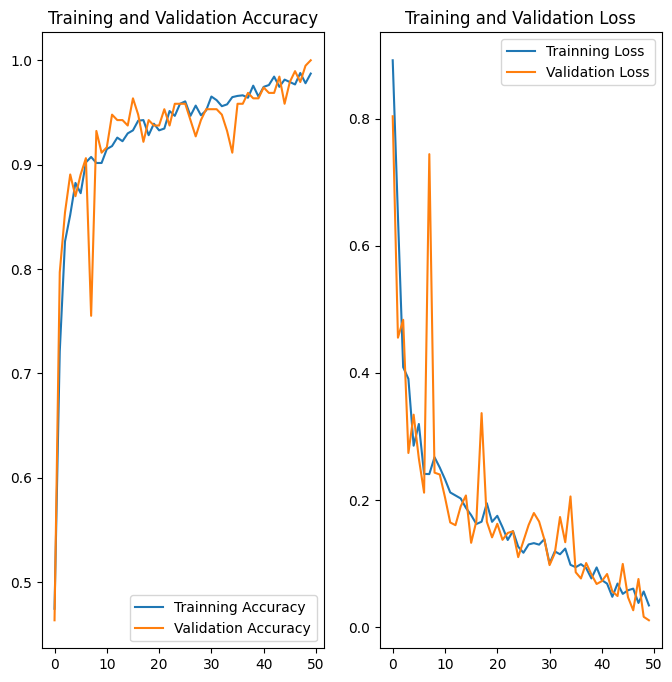

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Trainning Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Trainning Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict
Actual Label: Potato___Early_blight
Predicted Label: Potato___Early_blight


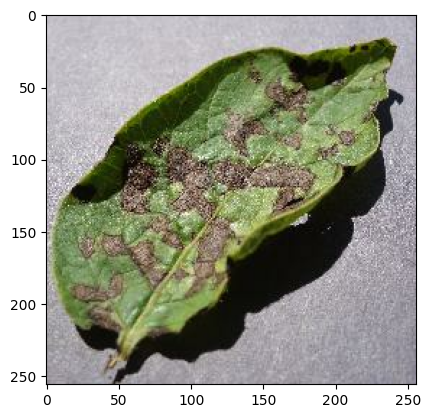

In [24]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])

batch_prediction = model.predict(images_batch)
print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [2]:
def predict (model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images_batch[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

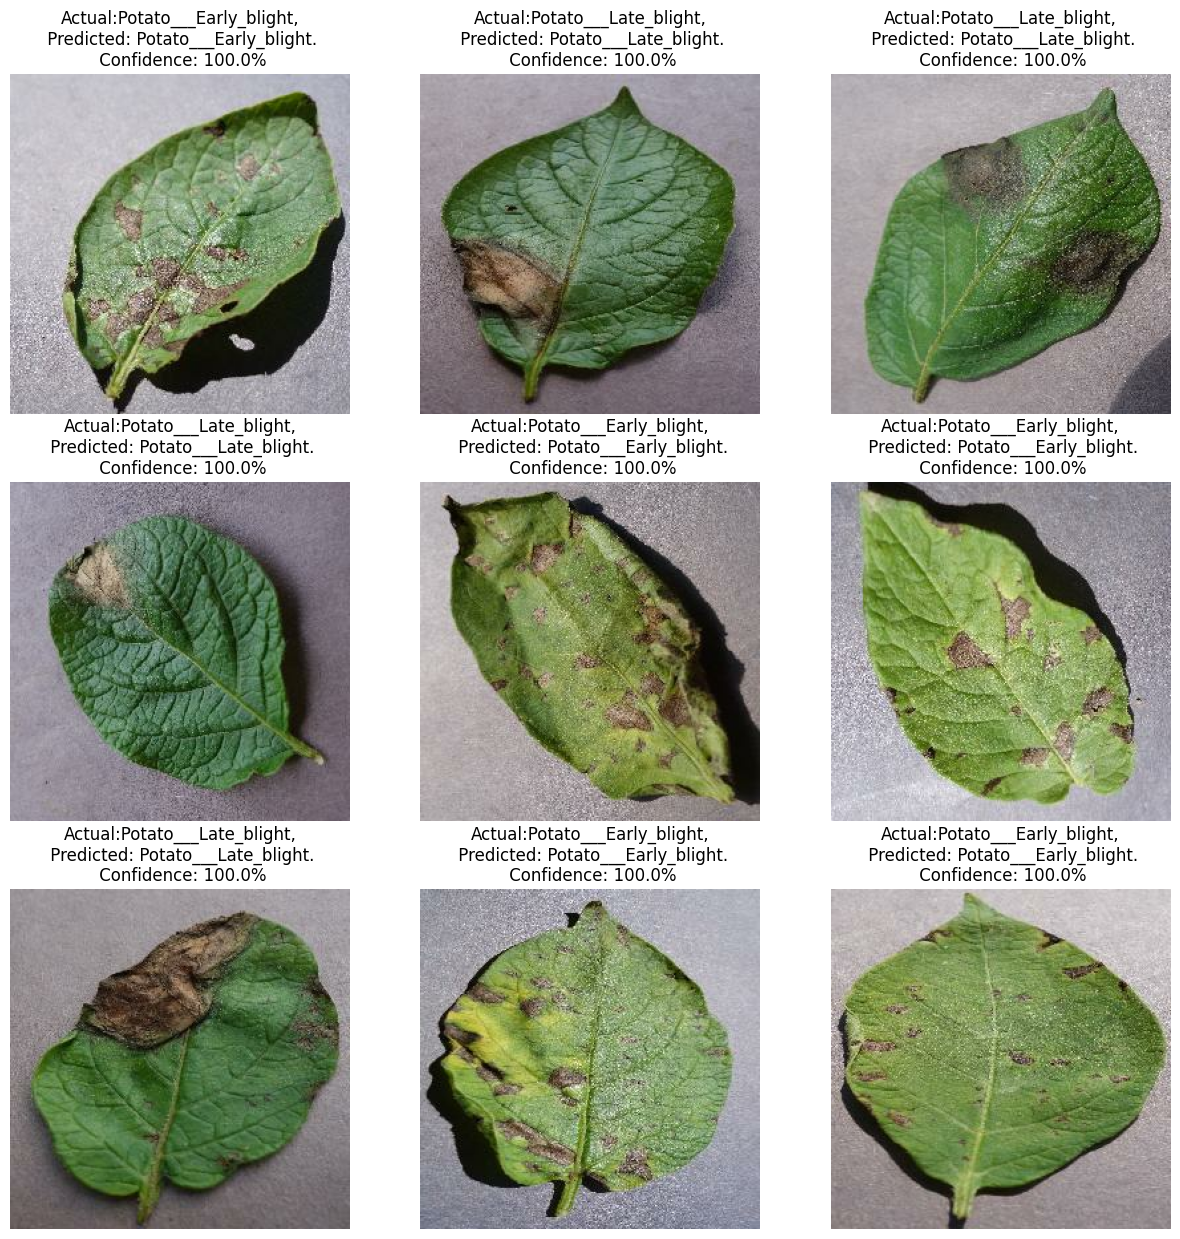

In [26]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [27]:
#saving the model
import os
model_version=max([int(i) for i in (os.listdir("../saved_models")+[0])])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/3\assets
